In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# PART 1
df = pd.read_csv('Dataset for Q1.csv')
print(df.head())
print(df.describe())
print(df.isnull().sum())

   Age  Mileage        Price
0   13    54785 -1630.906879
1    6    44790  4255.863971
2    1    35735  9848.489578
3    4    10592  5943.521049
4   12    30183 -2310.300853
               Age       Mileage         Price
count  1000.000000   1000.000000   1000.000000
mean      7.357000  45233.642000   3143.680577
std       4.008693  20058.777592   4820.077305
min       1.000000  10131.000000 -11073.405597
25%       4.000000  28585.250000   -507.983137
50%       7.000000  45053.500000   3357.960993
75%      11.000000  62470.500000   6649.071974
max      14.000000  79988.000000  16693.499679
Age        0
Mileage    0
Price      0
dtype: int64


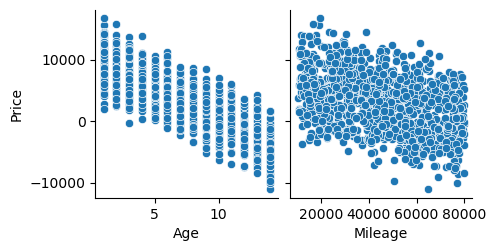

In [2]:
# PART 1
# Scatter plot to visualize the relationship between age, mileage, and prices
sns.pairplot(df, x_vars=['Age', 'Mileage'], y_vars='Price', kind='scatter')
plt.show()

In [3]:
# PART 2

from sklearn.model_selection import train_test_split

X = df[['Age', 'Mileage']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

     Age  Mileage
29     5    49421
535    9    31530
695    3    48115
557    2    16445
836   14    30713
..   ...      ...
106    6    36885
270    4    26627
860    7    31272
435    6    11435
102   11    55295

[800 rows x 2 columns]


In [4]:
# PART 2
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled)

[[-1.33844206  1.25211199]
 [-0.33043674  1.67973114]
 [-0.58243807  0.32231806]
 [ 1.43357256 -0.14513082]
 [ 0.9295699  -1.73882024]
 [ 0.67756857  1.73136968]
 [-1.33844206 -1.34957973]
 [ 0.67756857 -0.90359688]
 [-1.08644073  0.83049733]
 [-1.08644073  0.23630386]
 [-0.07843541  1.03890287]
 [ 0.67756857  0.92306641]
 [ 1.18157123  1.11400892]
 [ 0.42556724  0.70555408]
 [-0.07843541  0.49719858]
 [-1.08644073 -0.05106061]
 [ 0.17356592 -1.16459167]
 [-0.8344394   0.47928521]
 [-0.33043674 -1.69343637]
 [-0.58243807 -0.39136459]
 [-1.08644073 -1.47962679]
 [-0.8344394  -1.04860511]
 [-1.59044339  0.52176691]
 [-1.33844206 -0.72851622]
 [-0.07843541  0.98020906]
 [-1.33844206  0.31461231]
 [-0.8344394  -0.50269768]
 [ 1.68557389  1.06892527]
 [-0.8344394  -0.16124284]
 [-1.08644073  1.12226508]
 [ 0.17356592 -0.74347738]
 [-0.8344394  -1.15398376]
 [-0.8344394  -1.12581273]
 [-1.33844206  1.46462059]
 [ 0.9295699   1.34853395]
 [ 0.67756857  0.32952343]
 [-1.08644073 -1.05621078]
 

In [17]:
# PART 3
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix 
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mae," ", mse)


3772.999340651494   21250891.479017098


In [40]:
# PART 3

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 390 , 450 ,480 ,500, 520 ,700, 1500 ,10000], 'epsilon': [0.00001 ,0.0001, 0.001, 0.01, 0.1, 0.5, 1]}
grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_svm_model = SVR(kernel='linear', C=best_params['C'], epsilon=best_params['epsilon'])

# Train Now!
best_svm_model.fit(X_train_scaled, y_train)

SVR(C=480, epsilon=1e-05, kernel='linear')


Mean Absolute Error: 1649.8133479967444
Mean Squared Error: 4197565.1560220625
R-squared: 0.8412815276761855


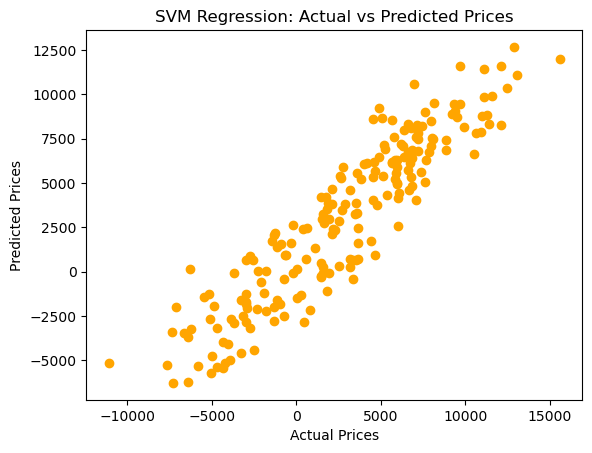

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred = best_svm_model.predict(X_test_scaled)
print()

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize predictions vs actual prices
plt.scatter(y_test, y_pred, color="orange")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('SVM Regression: Actual vs Predicted Prices')
plt.show()

   Feature  Coefficient
0      Age -3885.000193
1  Mileage -1908.235252


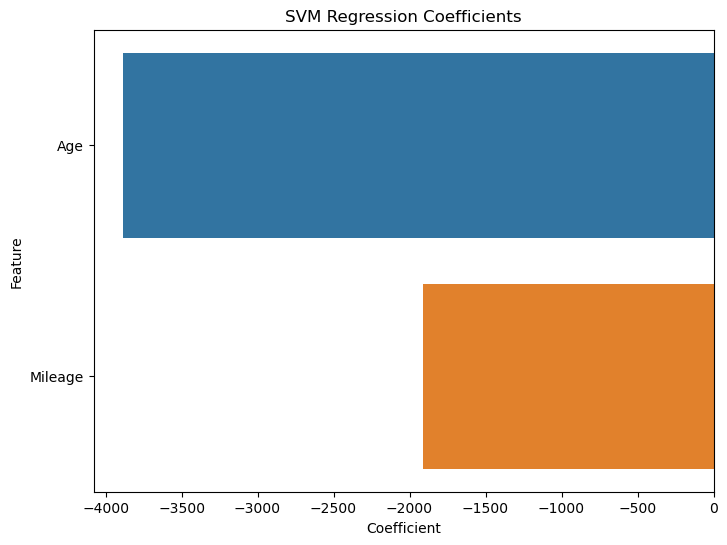

In [44]:

# PART 5 and 6

# Get the coefficients from the trained SVM model
coefficients = best_svm_model.coef_

# Create a DataFrame to display the coefficients along with the corresponding feature names
coef_df = pd.DataFrame({'Feature': ['Age', 'Mileage'], 'Coefficient': coefficients.flatten()})

# Display the coefficients
print(coef_df)


